In [6]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
X_val = pd.read_csv('data/X_val.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')
y_val = pd.read_csv('data/y_val.csv')
y_apache = pd.read_csv('data/y_apache_test.csv')

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Training the Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# define model
logreg = LogisticRegression(
    max_iter=1000,
    class_weight={1: 1},
    penalty='l1',
    solver='liblinear',
).fit(X_train, y_train.T.to_numpy()[0])

### Logistic Regression model results

In [ ]:
from sklearn.metrics import classification_report

y_pred_log = logreg.predict(X_test)
y_pred_log_proba = logreg.predict_proba(X_test)[::,1]

exp_deaths = 0
for i in y_pred_log_proba:
    exp_deaths += i
print("Expected number of deaths: ", exp_deaths)

threshold = 0.5
y_pred_log_proba_round = [min(math.ceil(x - threshold), 1) for x in y_pred_log_proba]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
display(conf_matrix_log)

print(classification_report(y_test, y_pred_log, target_names=['healthy', 'critical care']))

Expected number of deaths:  2681.691266183884


array([[4618, 1076],
       [ 301, 1255]])

               precision    recall  f1-score   support

      healthy       0.94      0.81      0.87      5694
critical care       0.54      0.81      0.65      1556

     accuracy                           0.81      7250
    macro avg       0.74      0.81      0.76      7250
 weighted avg       0.85      0.81      0.82      7250



### Racial biases

In [232]:
print(len(X_test))
y_pred_ethn = [[], [], [], [], [], [], []]
for i in range(len(X_test)):
    for j in range(7):
        if X_test.iloc[i, j] == 1:
            y_pred_ethn[j].append(i)
            break

for i in range(7):
    match i:
        case 0:
            print("African American: ")
        case 1:
            print("Asian:")
        case 2:
            print("Caucasion:")
        case 3:
            print("Hispanic:")
        case 4:
            print("Native American:")
        case 5:
            print("Other:")
        case 6:
            print("Missing:")

    y_test_cur = [y_test.to_numpy()[j] for j in y_pred_ethn[i]]
    y_pred_cur = [y_pred_log[j] for j in y_pred_ethn[i]]
    conf_matrix_log = confusion_matrix(y_test_cur, y_pred_cur)
    print("fpr: ", conf_matrix_log[0][1]/(conf_matrix_log[0][1] + conf_matrix_log[0][0]))
    print("fnr: ", conf_matrix_log[1][0]/(conf_matrix_log[1][0] + conf_matrix_log[1][1]))
    print("num: ", sum(sum(conf_matrix_log)))

print("Total:")
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("fpr: ", conf_matrix_log[0][1]/(conf_matrix_log[0][1] + conf_matrix_log[0][0]))
print("fnr: ", conf_matrix_log[1][0]/(conf_matrix_log[1][0] + conf_matrix_log[1][1]))
print("num: ", sum(sum(conf_matrix_log)))


7250
African American: 
fpr:  0.1927927927927928
fnr:  0.2
num:  720
Asian:
fpr:  0.16470588235294117
fnr:  0.11764705882352941
num:  102
Caucasion:
fpr:  0.18639455782312925
fnr:  0.19198664440734559
num:  5608
Hispanic:
fpr:  0.2672413793103448
fnr:  0.2
num:  302
Native American:
fpr:  0.0425531914893617
fnr:  0.3888888888888889
num:  65
Other:
fpr:  0.1947565543071161
fnr:  0.16923076923076924
num:  332
Missing:
fpr:  0.17346938775510204
fnr:  0.17391304347826086
num:  121
Total:
fpr:  0.18897084650509308
fnr:  0.19344473007712082
num:  7250


### Graphs and other visualizations

ROC-AUC: 0.89


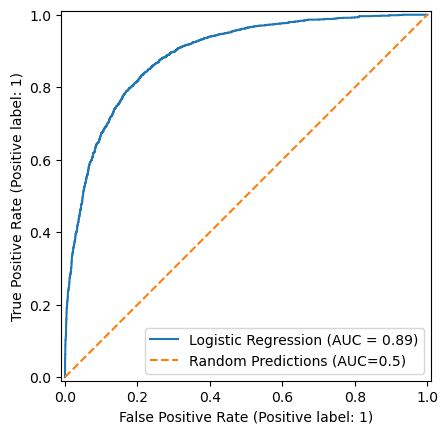

In [15]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt

# compute area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_log_proba)
print('ROC-AUC: {:.2f}'.format(roc_auc))

# plot ROC curve from predictions
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_log_proba, name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle="--", label='Random Predictions (AUC=0.5)')
plt.legend()
plt.show()

average precision: 0.72


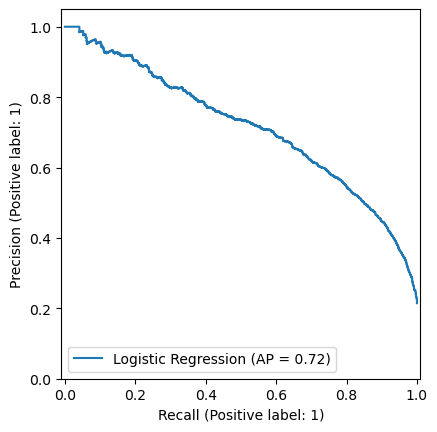

In [16]:
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay

# compute average precision
avg_precision = average_precision_score(y_true=y_test, y_score=y_pred_log_proba)
print('average precision: {:.2f}'.format(avg_precision))

# plot precision-recall curve
PrecisionRecallDisplay.from_predictions(y_true=y_test, y_pred=y_pred_log_proba, name='Logistic Regression')
plt.ylim(0,1.05)
plt.show()

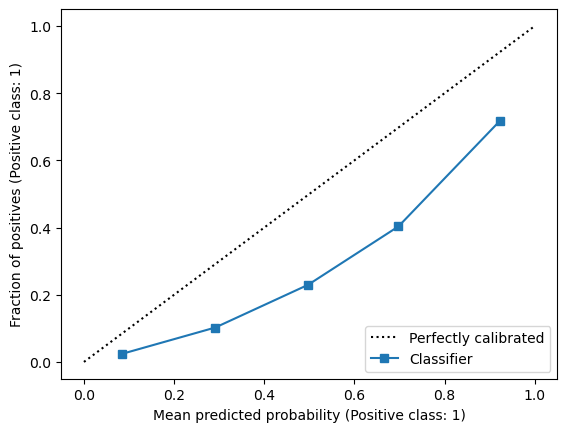

In [17]:
from sklearn.calibration import CalibrationDisplay

# plot calibration curve
disp = CalibrationDisplay.from_predictions(y_true=y_test, y_prob=y_pred_log_proba)
plt.show()

Score: -0.6540293557510628, Feature: 4; cat__ethnicity_Native American
Score: 0.6131558877675573, Feature: 12; cat__hospital_admit_source_Direct Admit
Score: -0.6223505466414828, Feature: 15; cat__hospital_admit_source_ICU
Score: 0.7000964992073935, Feature: 23; cat__hospital_admit_source_Step-Down Unit (SDU)
Score: 0.826004729832982, Feature: 29; cat__icu_admit_source_Other ICU
Score: -1.2261566329650107, Feature: 47; cat__apache_3j_bodysystem_Metabolic
Score: 0.6365408512941639, Feature: 49; cat__apache_3j_bodysystem_Neurological
Score: -1.0063227049221994, Feature: 56; num__elective_surgery
Score: 0.6951779640859806, Feature: 65; num__arf_apache
Score: 0.6268066596959013, Feature: 69; num__fio2_apache
Score: 0.9371492523931764, Feature: 72; num__gcs_unable_apache
Score: 0.8453742203549006, Feature: 87; num__ventilated_apache
Score: -1.3030989873185144, Feature: 177; num__aids
Score: 0.7890421861009489, Feature: 184; num__solid_tumor_with_metastasis


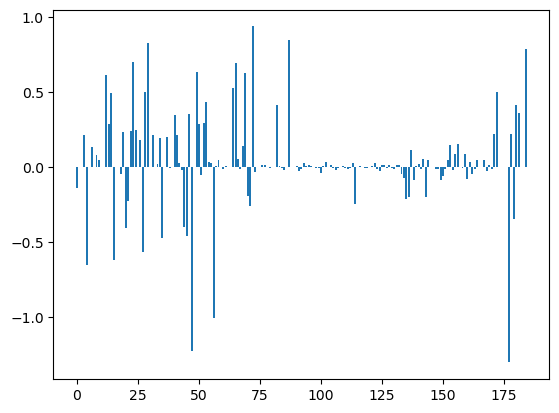

In [235]:
coef = logreg.coef_[0]

for i,j in enumerate(coef):
    if (abs(j) > 0.6):
        print("Score: " + str(j) + ", Feature: " + str(i) + "; " + X_test.columns[i])
    # if "ethnicity" in X_test.columns[i]:
        # print("Score: " + str(j) + ", Feature: " + str(i) + "; " + X_test.columns[i])


plt.bar([X for X in range(len(coef))], coef)
plt.show()

## Linear Regression model training and results

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import math

linreg = LinearRegression().fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

threshold = 0.5
y_pred_lin = [min(math.ceil(x - threshold), 1) for x in y_pred_lin.T[0]]

conf_matrix_lin = confusion_matrix(y_test, y_pred_lin)
display(conf_matrix_lin)

print("fpr: ", conf_matrix_lin[0][1]/(conf_matrix_lin[0][1] + conf_matrix_lin[0][0]))
print("fnr: ", conf_matrix_lin[1][0]/(conf_matrix_lin[1][0] + conf_matrix_lin[1][1]))

print(classification_report(y_test, y_pred_lin, target_names=['healthy', 'critical care']))

array([[4603, 1091],
       [ 311, 1245]])

fpr:  0.19160519845451351
fnr:  0.19987146529562982
               precision    recall  f1-score   support

      healthy       0.94      0.81      0.87      5694
critical care       0.53      0.80      0.64      1556

     accuracy                           0.81      7250
    macro avg       0.73      0.80      0.75      7250
 weighted avg       0.85      0.81      0.82      7250



Score: -0.19247254771892205, Feature: 15; cat__hospital_admit_source_ICU
Score: -0.1278364333096885, Feature: 17; cat__hospital_admit_source_Observation
Score: 0.12760122819423986, Feature: 29; cat__icu_admit_source_Other ICU
Score: -0.16424871830582172, Feature: 56; num__elective_surgery
Score: 0.1652194613681184, Feature: 64; num__apache_post_operative
Score: 0.17103894905676703, Feature: 72; num__gcs_unable_apache
Score: 0.1487233011439302, Feature: 87; num__ventilated_apache
Score: -0.14841731855321094, Feature: 171; num__d1_arterial_ph_max
Score: 0.124756776896014, Feature: 172; num__d1_arterial_ph_min
Score: -0.16570306401136362, Feature: 177; num__aids
Score: 0.13188831957263183, Feature: 184; num__solid_tumor_with_metastasis


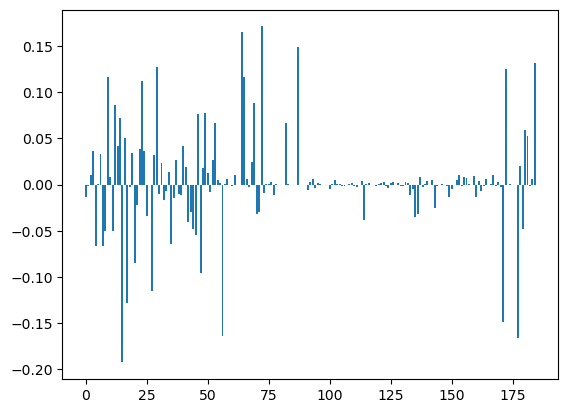

In [112]:
coef = linreg.coef_[0]

for i,j in enumerate(coef):
    if (abs(j) > 0.12):
        print("Score: " + str(j) + ", Feature: " + str(i) + "; " + X_test.columns[i])

plt.bar([X for X in range(len(coef))], coef)
plt.show()

## APACHE scores and breakdown

In [162]:

from sklearn.metrics import classification_report
import math
import numpy as np

y_indices = []
y_apache_numpy = y_apache.to_numpy().T[0]
for i, j in enumerate(y_apache_numpy):
    if np.isnan(j) or j < 0:
        y_indices.append(i)

y_apache_numpy = np.delete(y_apache_numpy, y_indices)
y_test_apache = y_test.drop(y_indices)

exp_deaths = 0
for i in y_apache_numpy:
    exp_deaths += i
print("Expected number of deaths: ", exp_deaths)

threshold_apache = 0.12
y_apache_round = [min(math.ceil(x - threshold_apache), 1) for x in y_apache_numpy]

conf_matrix_lin = confusion_matrix(y_test_apache, y_apache_round)
display(conf_matrix_lin)

print(classification_report(y_test_apache, y_apache_round, target_names=['healthy', 'critical care']))

Expected number of deaths:  988.3199999999711


array([[3973, 1094],
       [ 297, 1087]])

               precision    recall  f1-score   support

      healthy       0.93      0.78      0.85      5067
critical care       0.50      0.79      0.61      1384

     accuracy                           0.78      6451
    macro avg       0.71      0.78      0.73      6451
 weighted avg       0.84      0.78      0.80      6451



### APACHE scores vs Logistic Regression model

ROC-AUC log: 0.89
ROC-AUC log: 0.86


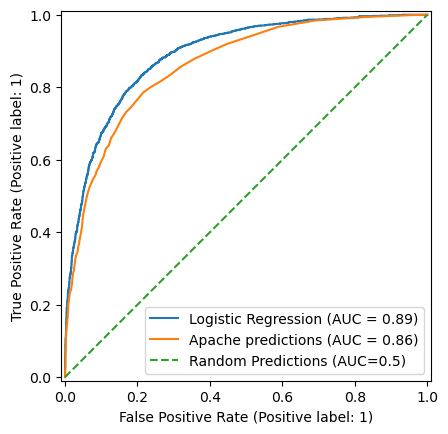

In [159]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt

# compute area under the ROC curve
roc_auc_log = roc_auc_score(y_test, y_pred_log_proba)
roc_auc_apache = roc_auc_score(y_test_apache, y_apache_numpy)
print('ROC-AUC log: {:.2f}'.format(roc_auc_log))
print('ROC-AUC log: {:.2f}'.format(roc_auc_apache))

# plot ROC curve from predictions
regres_disp = RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_log_proba, name='Logistic Regression')
apache_disp = RocCurveDisplay.from_predictions(y_true=y_test_apache, y_pred=y_apache_numpy, name='Apache predictions', ax=regres_disp.ax_)
plt.plot([0, 1], [0, 1], linestyle="--", label='Random Predictions (AUC=0.5)')
plt.legend()
plt.show()